<a href="https://colab.research.google.com/github/rohingarg/Used-Car-Data/blob/main/EDA_%26_Bootstrapping_on_UsedCarsDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis on Used Cars Data**

The data set we are using is from Kaggle, and it is on used car sales on craigslist. 

Link: https://www.kaggle.com/austinreese/craigslist-carstrucks-data


In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import scipy.stats
import scipy.optimize
import scipy.spatial
from sklearn.utils import resample


In [ ]:
df = pd.read_csv('vehicles.csv', engine='python', encoding='utf-8', error_bad_lines=False)

In [ ]:
df.shape

(423857, 25)

In [ ]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,1GTEK19T3YE366021,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,NaN,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,NaN,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,NaN,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,1GTHK23D57F102022,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [ ]:
#dropping columns we won't use later
todrop = ['id', 'url', 'region_url', 'image_url', 'description', 'lat', 'long', 'vin', 'county']
for col in todrop: 
  del df[col]

In [ ]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,duluth / superior,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn
1,duluth / superior,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn
2,new haven,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct
3,albuquerque,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm
4,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn


In [ ]:
df['price'].max()

3808256046

**Getting rid of all the craigslist listings that had prices above 40000**

In [ ]:
df_lp = df[df['price'] < 40000]
df = df_lp

In [ ]:
df.shape

(404467, 16)

# Handling missing data

In [ ]:
df.isnull().sum()

region               0
price                0
year             90595
manufacturer    104013
model            94099
condition       233033
cylinders       213913
fuel             92161
odometer        147451
title_status     91772
transmission     91376
drive           185093
size            304174
type            174949
paint_color     192579
state                0
dtype: int64

In [ ]:
quant = ['year','odometer' ]
categ = ['manufacturer', 'model', 'condition', 'title_status', 'transmission', 'drive','size', 'type', 'paint_color','fuel', 'cylinders']


In [ ]:
#missing values in columns of quantitative data will be replaced by the mean for that column
for val in quant:
  df[val] = df[val].fillna(df[val].mean())

In [ ]:
#missing values in columns of quantitative data will be replaced by the mode for that column
for cat in categ:
  df[cat] = df[cat].fillna(df[cat].mode().iloc[0])

In [ ]:
df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

# Data visualization

**Is there a relationship between year + fuel type with price?**

Text(0.5, 1.0, 'Year vs. Price: Colored by Fuel Type')

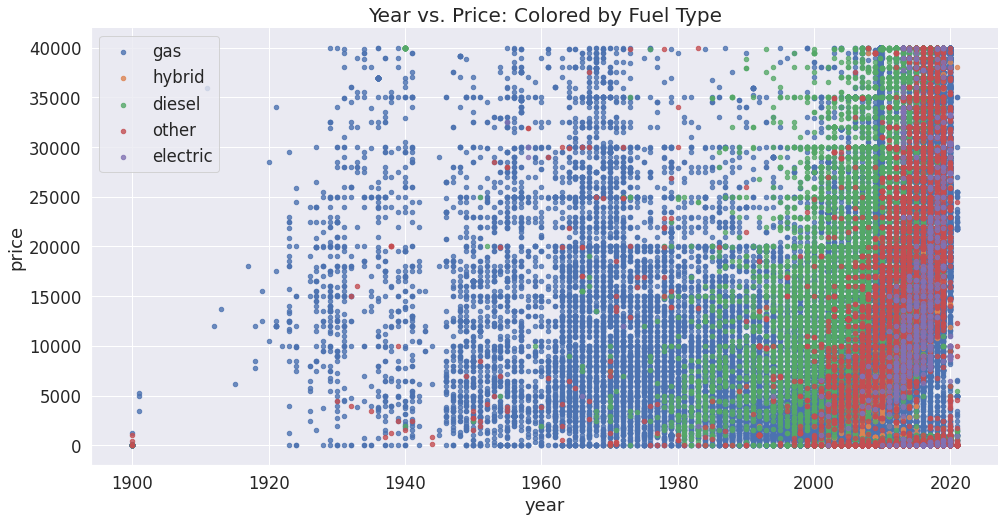

In [ ]:
sns.lmplot(x= 'year', y = 'price', data = df, fit_reg = False, hue = 'fuel', legend = False, height = 7, aspect = 2, scatter_kws = {"s" : 20})
plt.legend(loc= 'upper left')
plt.title('Year vs. Price: Colored by Fuel Type', fontsize = 20)

**Are there any patterns with price among different car manufacturers?**

Text(0.5, 1.0, 'Price for each manufacturer')

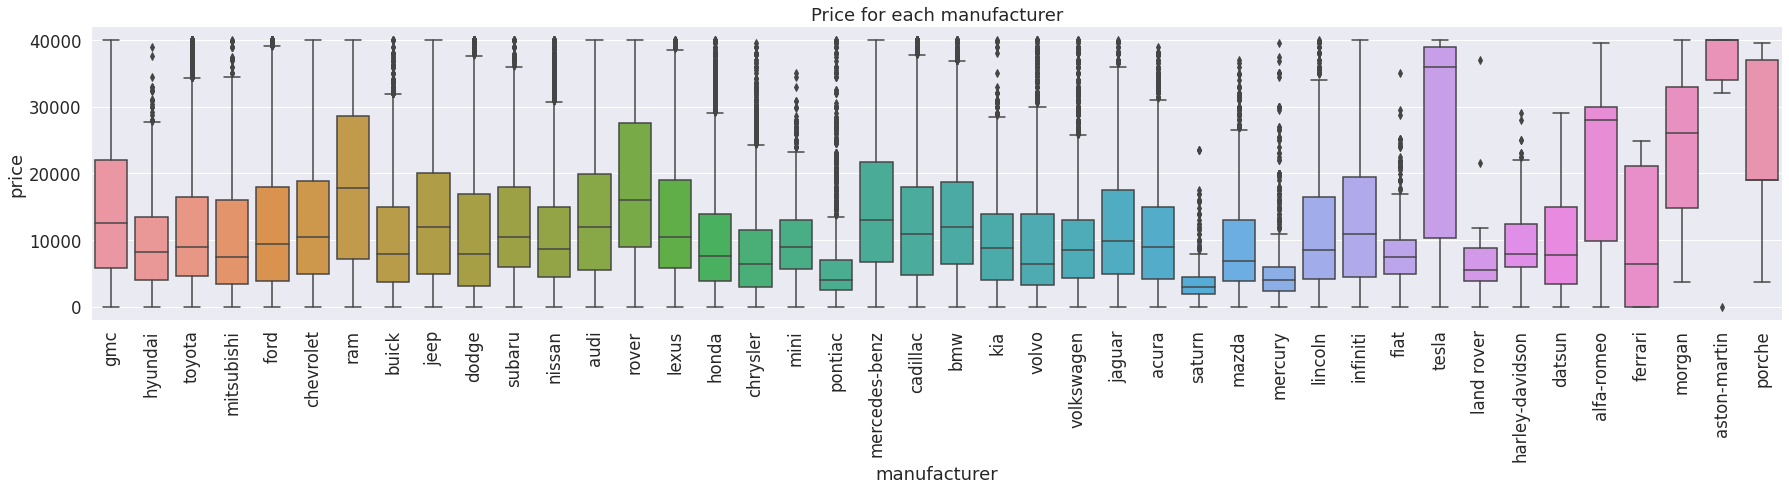

In [ ]:
#Boxplot showing advertised price of the used car depending on what the manufacturer is
box = sns.catplot(x='manufacturer', y = 'price', data = df,kind = 'box', height = 5, aspect = 5)
box.set_xticklabels(rotation = 90)
plt.title('Price for each manufacturer')

This graph suggests that in the 0 dollars to 40000 dollars price range,
- aston-martins listed on craigslist are generally the most expensive
-teslas are also generally more expensive
- saturn, pontiac, mercury,fiat, and land rover are brands that have listings on the cheaper side

**Which car manufacturer's used cars (in the price range $0-$40000) are most frequently listed on craigslist?**

Text(0.5, 1.0, 'Number of Listings for Each Manufacturer ($0-$40000 price range)')

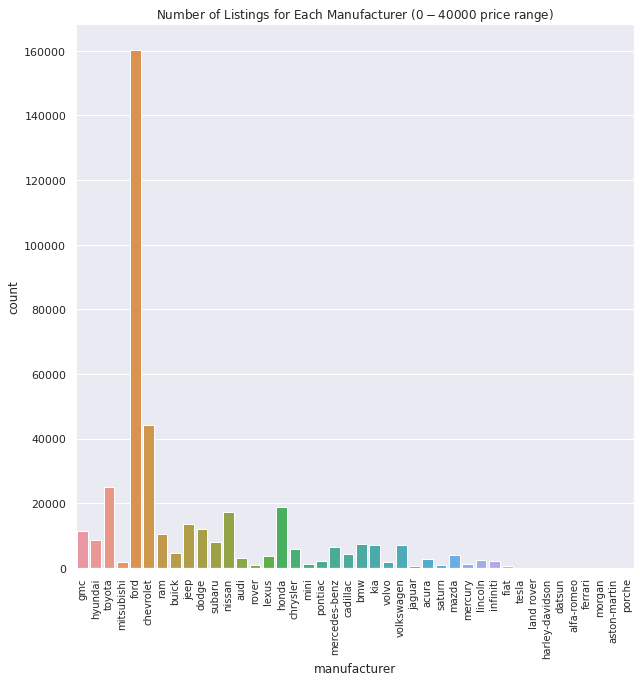

In [ ]:
sns.set(rc = {'figure.figsize': (10,10)})
freq = sns.countplot( x= 'manufacturer', data = df)
freq.set_xticklabels(freq.get_xticklabels(), rotation = 90, fontsize = 10)
plt.title('Number of Listings for Each Manufacturer ($0-$40000 price range)')

Considering the 0 dollars to 40,000 dollars price range, Ford cars are most commonly advertised on craigslist

**Graphical analysis of the relationship between condition and average price**

In [ ]:
cond = df.groupby(['condition']).mean()
cond.head()

,price,year,odometer
condition,,,
excellent,12121.355025,2010.181277,99965.143102
fair,3206.631634,1997.932767,166400.187935
good,11024.177074,2007.698472,113464.418022
like new,13769.260864,2011.442775,83282.644877
new,13238.508353,2013.321002,64521.218160


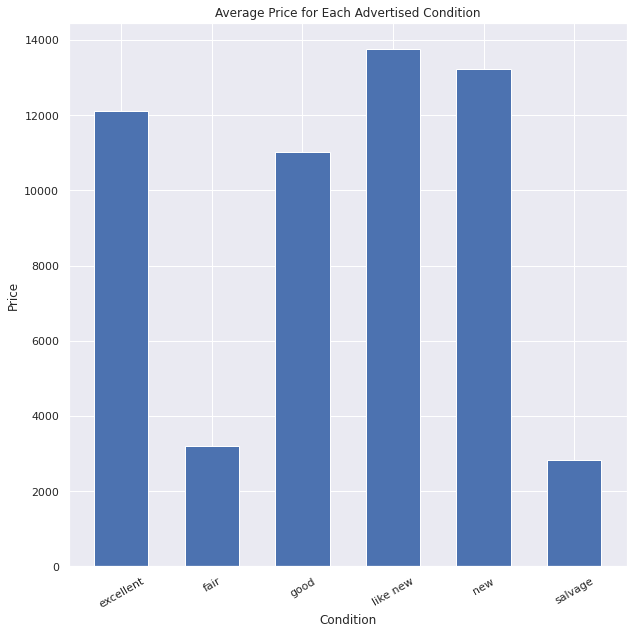

In [ ]:
#Barplot showing average advertised price of the used car depending on what condition it is in 
plt.bar(cond.index, cond['price'], width = 0.6)
plt.xticks(rotation = 30)
plt.title('Average Price for Each Advertised Condition')
plt.ylabel('Price')
plt.xlabel('Condition')
plt.show()

Obviously, cars in better condition are, on average, sold for a higher price

**Are used cars of a certain color generally more expensive than used cars of another color?**

In [ ]:
color = df.groupby(['paint_color']).mean()
color.head()

,price,year,odometer
paint_color,,,
black,13264.351835,2010.926371,97801.492479
blue,10972.715038,2008.347159,104373.034467
brown,10160.687028,2006.557480,117374.922911
custom,12867.298750,2007.440151,102654.092004
green,8923.590432,2001.939106,130612.254555


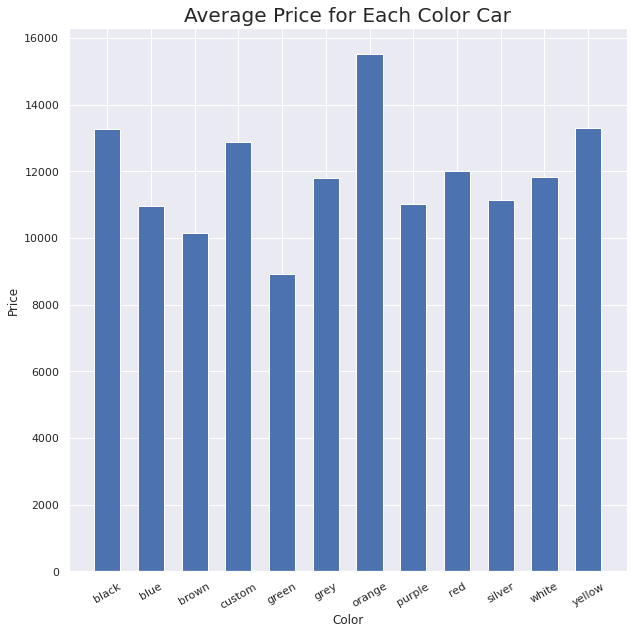

In [ ]:
#Barplot showing average  price of the used car depending on what color it is
plt.bar(color.index, color['price'], width = 0.6)
plt.xticks(rotation = 30)
plt.title('Average Price for Each Color Car', fontsize = 20)
plt.ylabel('Price')
plt.xlabel('Color')
plt.show()

- Orange- colored used cars on craigslist appear to be the most expensive on average
- Green-colored used cars on craigslist appear to be the least expsneive on average 

**Is there a type of used car that is on average, more expensive than other types of cars?**

In [ ]:
cartype = df.groupby(['type']).mean()
cartype.head()

,price,year,odometer
type,,,
SUV,12648.732115,2011.667539,102855.475196
bus,14239.928783,2003.712166,123710.941770
convertible,12877.234821,1999.817808,84133.940072
coupe,13351.713688,2004.363555,87252.851387
hatchback,9389.308389,2012.166263,86138.009717


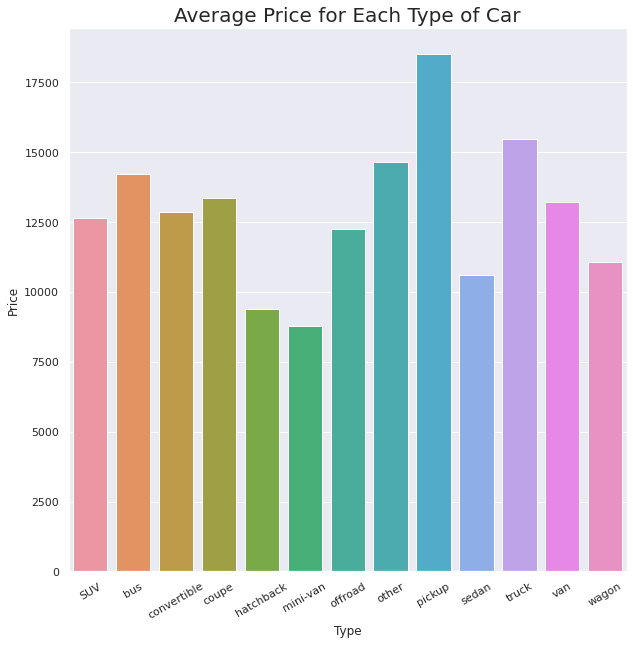

In [ ]:
sns.barplot( x= cartype.index, y = 'price', data = cartype)
plt.xticks(rotation = 30)
plt.title('Average Price for Each Type of Car', fontsize = 20)
plt.ylabel('Price')
plt.xlabel('Type')
plt.show()

On average, used pickup trucks are the most expensive, and mini-vans are the cheapest

Text(0.5, 1.0, 'Distribution of Prices for each Car Type')

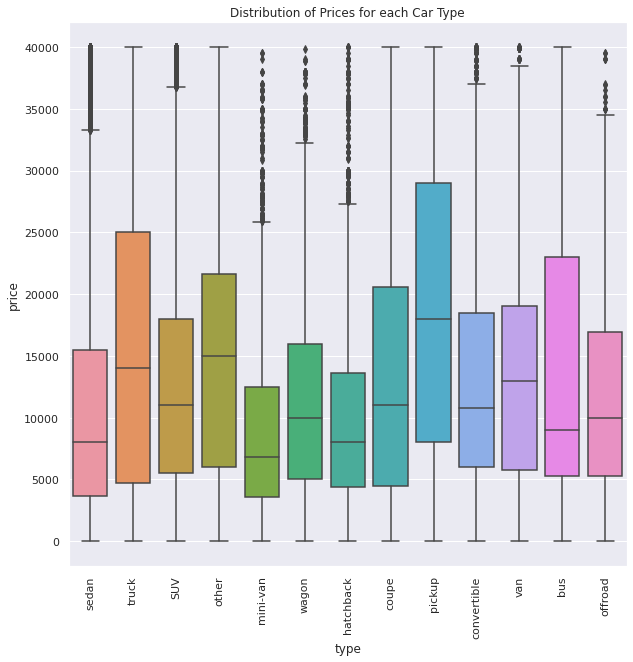

In [ ]:
#graph showing distribution of prices based on car type 
sns.boxplot(data = df,x = 'type', y = 'price')
plt.xticks(rotation = 90)
plt.title('Distribution of Prices for each Car Type')

**Is there a relationship between how many cylinders a car has and its price?**

Text(0.5, 1.0, 'How many cylinders a Used Car Has vs. Sale Price')

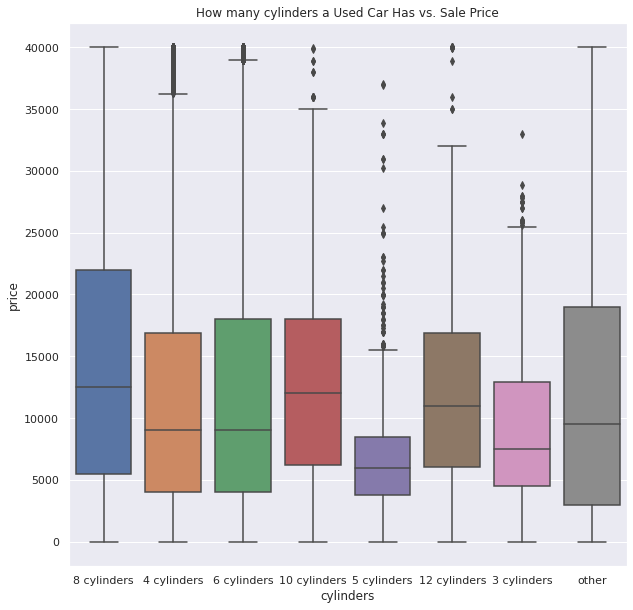

In [ ]:
sns.boxplot(data = df, x = 'cylinders', y = 'price')
plt.title('How many cylinders a Used Car Has vs. Sale Price')

**What car manufacturers have the highest and lowest average car prices?**

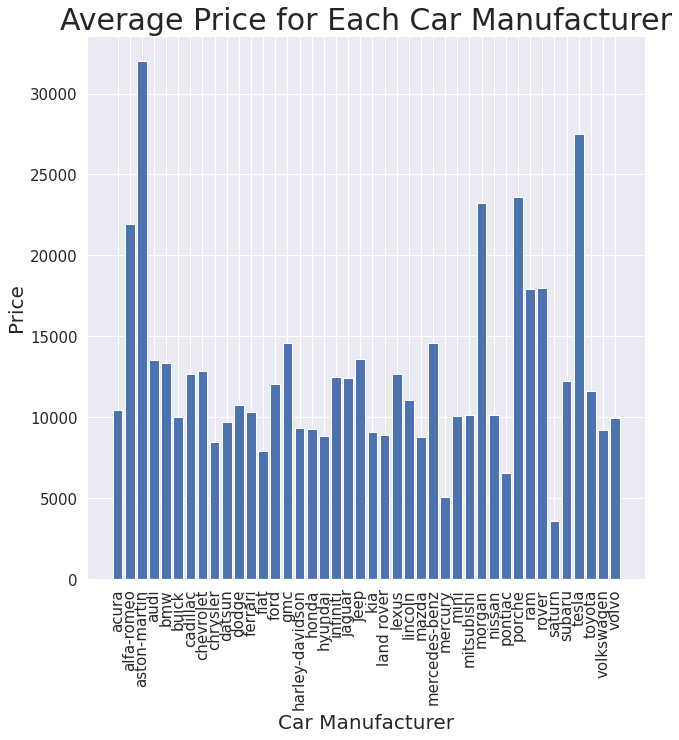

In [ ]:
manufacturer = df.groupby(['manufacturer']).mean()
plt.bar(manufacturer.index, manufacturer['price'], width = 0.8)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 15)
plt.title('Average Price for Each Car Manufacturer', fontsize = 30)
plt.ylabel('Price', fontsize = 20)
plt.xlabel('Car Manufacturer', fontsize = 20)
plt.rcParams["figure.figsize"] = [32,18]
plt.show()

Aston-Martin, Tesla, and Porsche have the three highest average car price whereas Saturn, Mercury, and Pontiac have the three lowest.

Taking a look at the distributions or the years when the vehicles were made and the miles on the odometer.

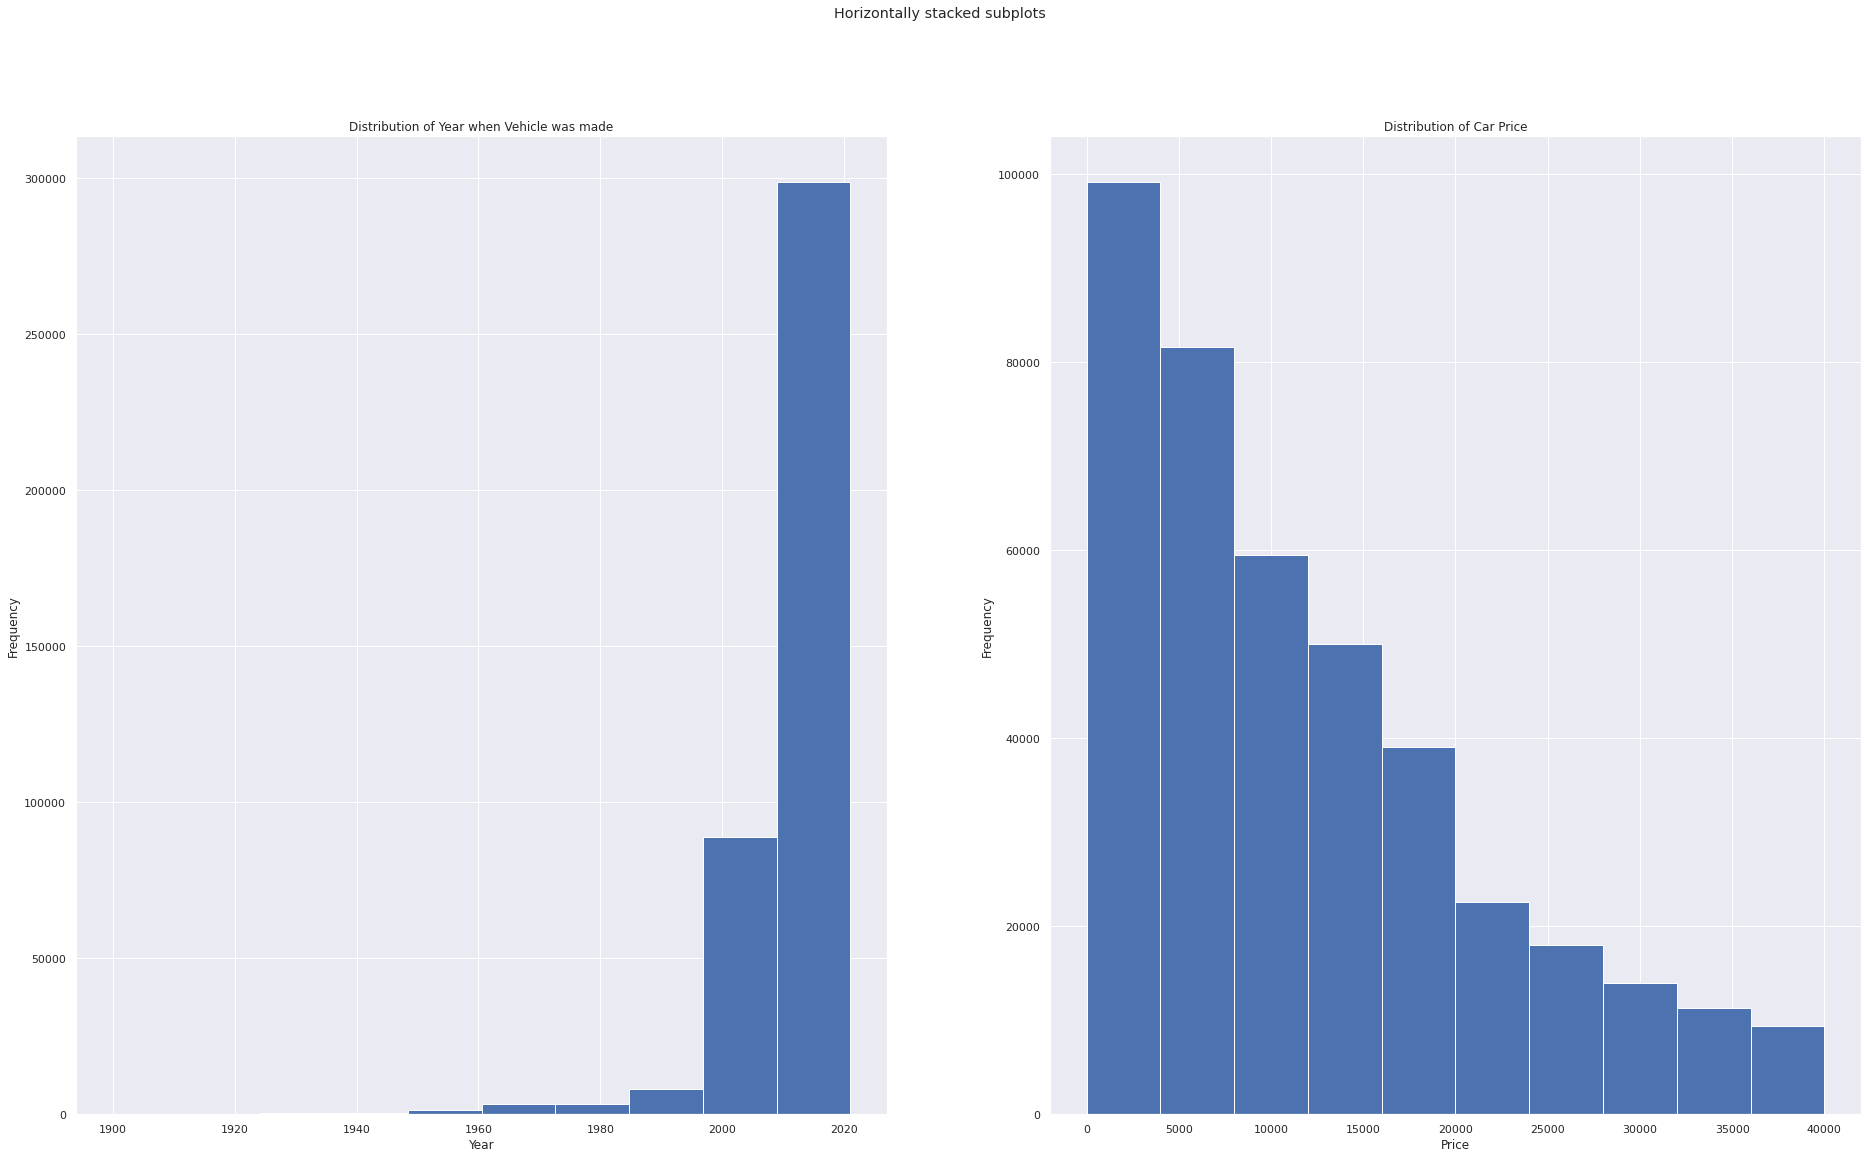

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')

ax1.hist(df["year"])
ax1.set_title("Distribution of Year when Vehicle was made")
ax1.set_xlabel("Year")
ax1.set_ylabel("Frequency")

ax2.hist(df["price"])
ax2.set_title("Distribution of Car Price")
ax2.set_xlabel("Price")
ax2.set_ylabel("Frequency")

plt.show()

Looking for a correlation between the three numerical values, Year, Price, and Odometer

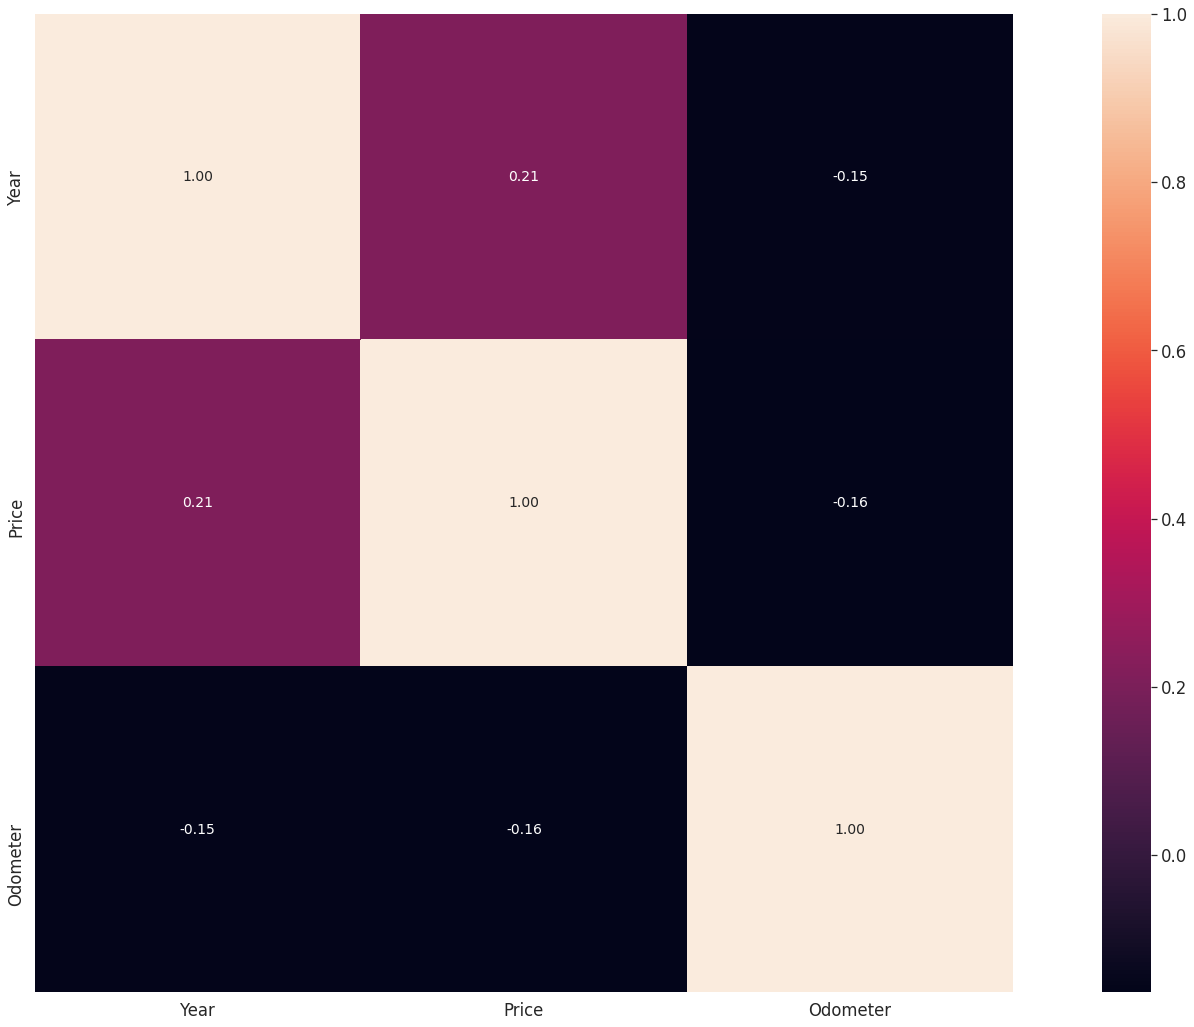

In [ ]:
df_numeric = df[['year', 'price', 'odometer']]
column_names = ['Year', 'Price', "Odometer"]
corr_coef = np.corrcoef(df_numeric.values.T)
sns.set(font_scale=1.5)
heat_map = sns.heatmap(corr_coef,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':14},
                yticklabels=column_names,
                xticklabels=column_names)

# Bootstrapping


Describe odometer variable, including mean, using simple python method:

In [ ]:
 df['odometer'].describe()

count    4.044670e+05
mean     1.024981e+05
std      9.710581e+04
min      0.000000e+00
25%      7.727050e+04
50%      1.024981e+05
75%      1.130000e+05
max      1.000000e+07
Name: odometer, dtype: float64

Create a sample of the population data with replacement:

In [ ]:
 df.sample(100, replace=True).describe()

,price,year,odometer
count,100.000000,100.000000,100.000000
mean,11236.170000,2009.076199,106986.916120
std,9739.766186,7.032757,50290.995770
min,0.000000,1971.000000,124.000000
25%,3762.500000,2007.000000,85316.500000
50%,7690.000000,2009.629282,102498.076824
75%,15999.250000,2012.000000,124589.750000
max,39999.000000,2019.000000,261875.000000


Create bootstrap distribution of median, repeat 1000 times:

102498.07682401096

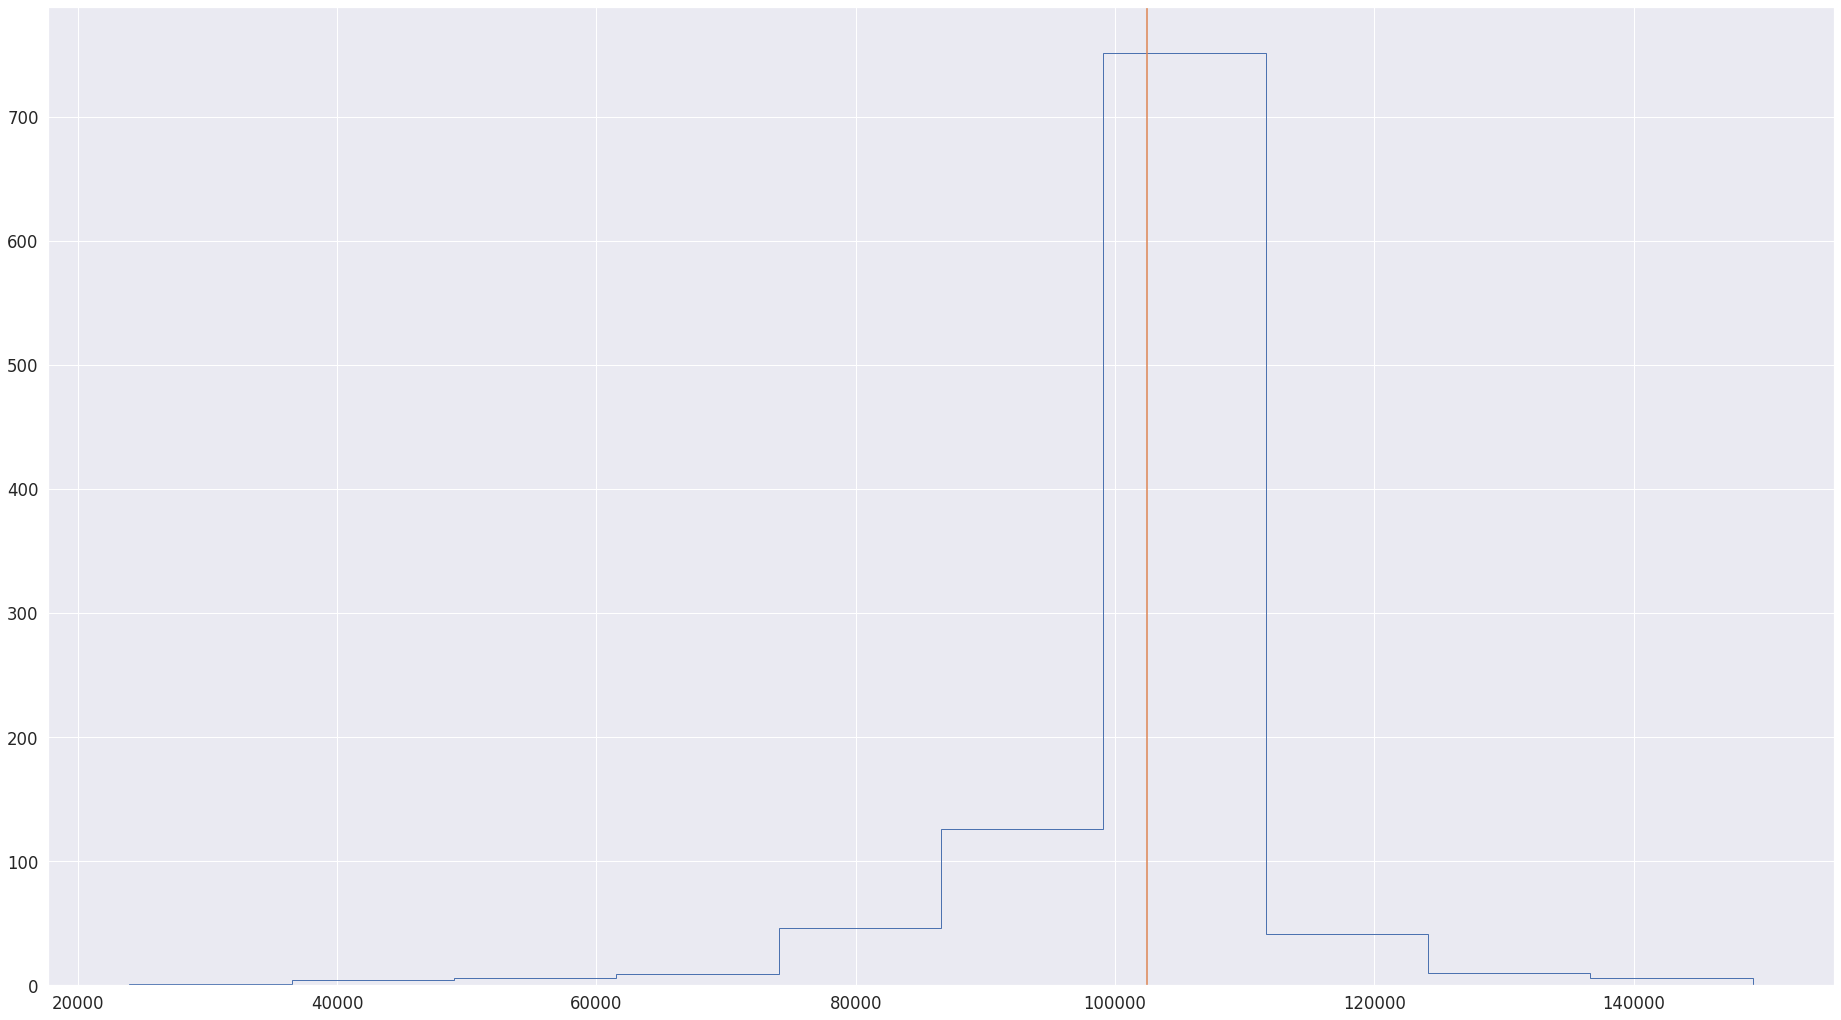

In [ ]:
bootstrap = pd.DataFrame([{'medianmileage': [df['odometer'].sample(10, replace=True).median() for i in range(1000)]}])

bootstrap.medianmileage.hist(histtype= 'step')

plt.axvline(df['odometer'].median(), color = 'C1')

np.median(df['odometer'])

Confidence interval:

In [ ]:
conf_int = np.percentile(df['odometer'], [2.5, 97.5])
conf_int

array([  9202., 217000.])

Kernel Density Plot:

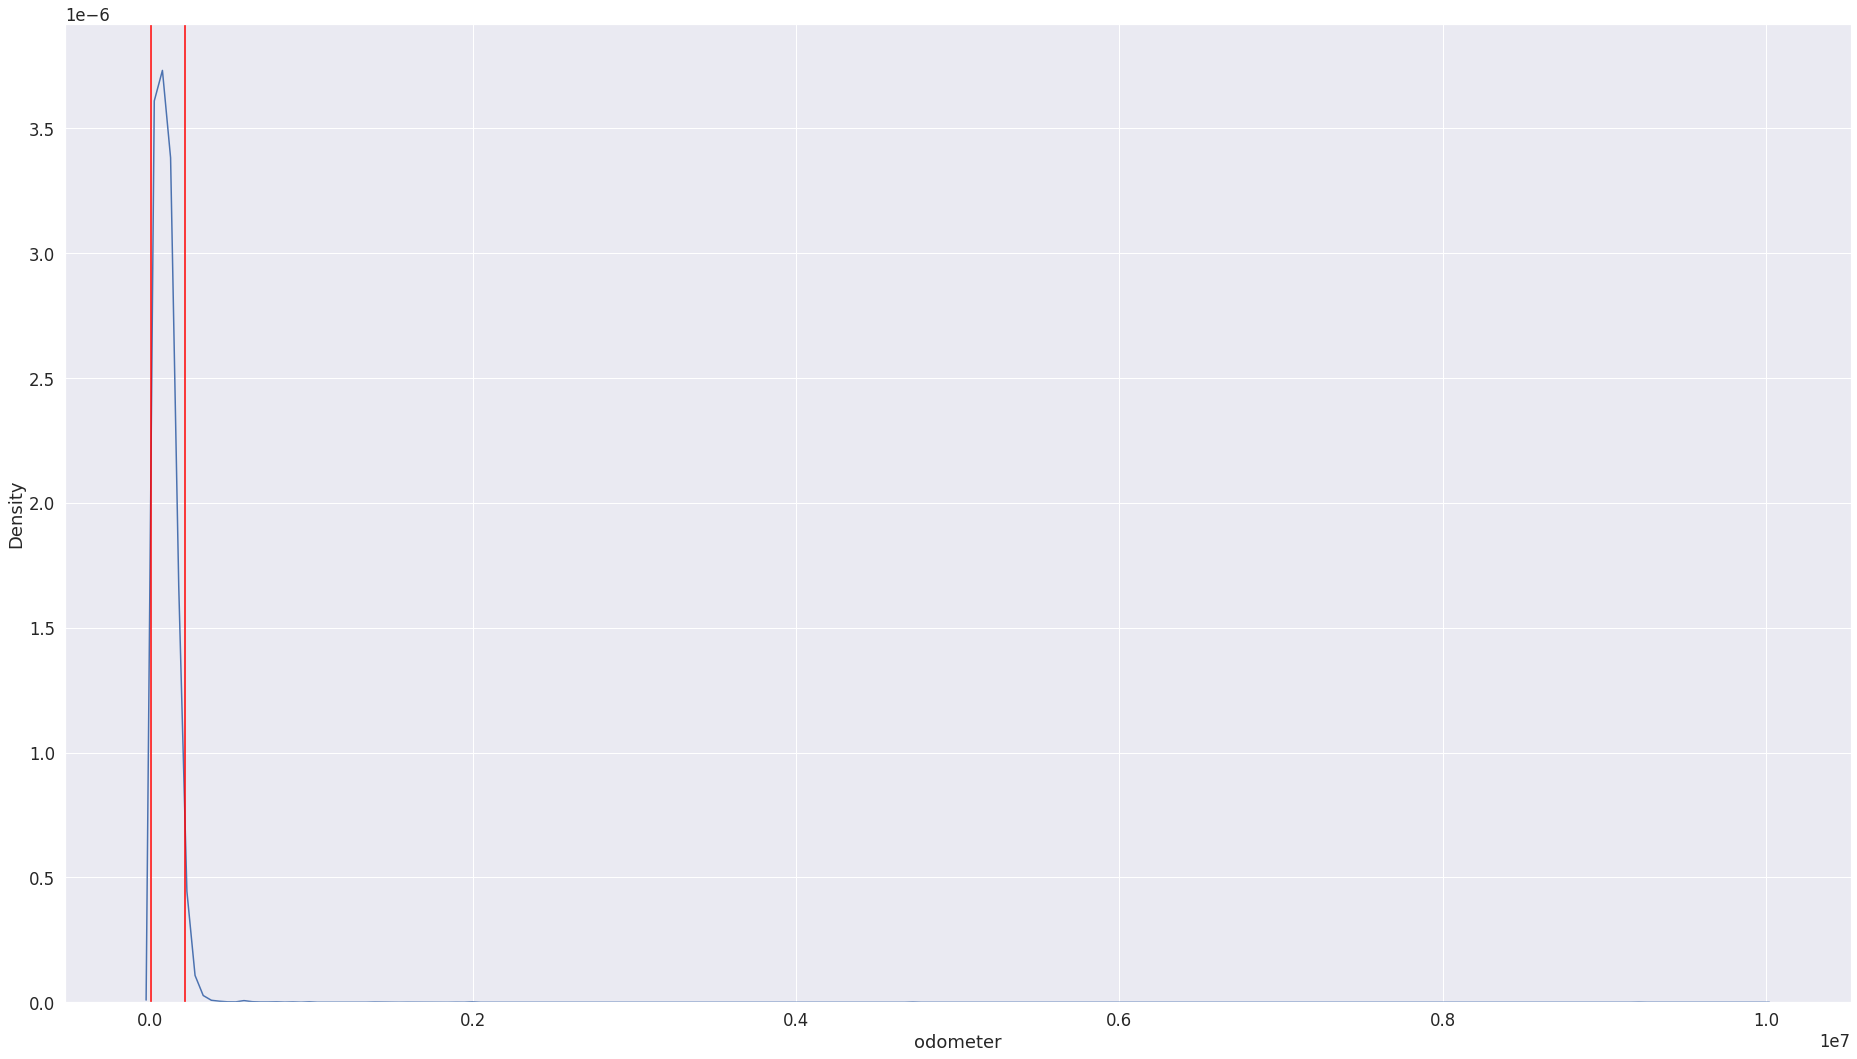

In [ ]:
sns.kdeplot(df['odometer'])
for endpoint in conf_int:
    plt.axvline(endpoint, color ='red')

Alternate median:

In [ ]:
median_odometer_samples = []
for i in range(1000):
    boot_sample = resample(df['odometer'])
    median_odometer_samples.append(boot_sample.median())

np.median(median_odometer_samples)

102498.07682401096